In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import control
from scipy.optimize import curve_fit

In [2]:
# DESCOMENTAR NO FIM PARA GRAVAR PLOTS EM LATEX. DEMORAM MAIS A GERAR
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['axes.linewidth'] = 1.5

# Sessão 1

## 2.5.5

In [3]:
def get_data(path, columns):
    db     = pd.ExcelFile(path)
    sheets = dict() #DICIONÁRIO COM AS FOLHAS

    for freq in db.sheet_names:
        data = db.parse(freq)[columns]
        sheets[freq] = data
    
    return sheets

In [4]:
data = get_data(path='/Users/thomasgaehtgens/BIBLIOTECA/MEFT/EG/LABS/LAB - 1/DADOS/GRUPO 7 3a SESSAO - 2.5.5.xlsx', columns=['Time (Secs)', 'CHAN1', 'CHAN2'])

In [5]:
data = data['2.5.5']

In [6]:
data['Time (Secs)'][0]

-0.00175

In [7]:
time = 1000*(data['Time (Secs)'] - data['Time (Secs)'][0])
    
chn1 = data['CHAN1']
chn2 = data['CHAN2']

In [8]:
print([i for i in time if i > 1 and i < 1.5])

[1.015, 1.05, 1.085, 1.1199999999999999, 1.1549999999999998, 1.19, 1.2249999999999999, 1.2599999999999998, 1.295, 1.33, 1.365, 1.3999999999999997, 1.4349999999999998, 1.47]


$T_H$ experimental: 0.5599999999999999
$T_L$ experimental: 0.56


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


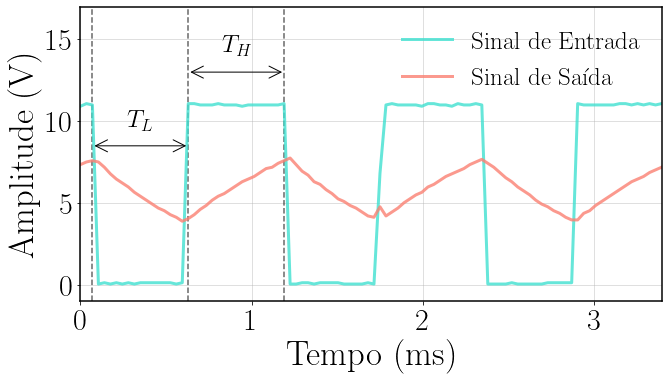

In [9]:
fig = plt.figure()
fig.set_size_inches(10, 6)

ax  = fig.add_subplot(1, 1, 1)

ax.plot(time, chn1, color='turquoise', alpha=0.8, label='Sinal de Entrada'  , lw=3)
ax.plot(time, chn2, color='salmon'   , alpha=0.8, label='Sinal de Saída', lw=3)

#ax.vlines(time[0], 0, 15)
#ax.vlines(time[10], 0, 15)
#
#ax.vlines(time[32], 0, 15)
#ax.vlines(time[35], 0, 15)

max1 = time[2]
max2 = max(chn1[15:20])
max3 = max(chn1[32:35])

ax.vlines(time[2], -1, 17, linestyles='--', alpha=0.6)
ax.vlines(time[list(chn1[15:20]).index(max2) + 15], -1, 17, linestyles='--', alpha=0.6)
ax.vlines(time[list(chn1[32:45]).index(max3) + 32], -1, 17, linestyles='--', alpha=0.6)

x1 = time[2]
x2 = time[list(chn1[15:20]).index(max2) + 15]

print(r'$T_H$ experimental: ' + str(x2-x1))

#T_H
ax.annotate('', xy=(x1, 8.5), xytext=(x2, 8.5),
            arrowprops={'arrowstyle': '<->'}, va='center')
x1 = time[list(chn1[15:20]).index(max2) + 15]
x2 = time[list(chn1[30:40]).index(max3) + 30]

print(r'$T_L$ experimental: ' + str(x2-x1))

#T_L
ax.annotate('', xy=(x1, 13), xytext=(x2, 13),
            arrowprops={'arrowstyle': '<->'}, va='center')


#ax.text(0.73, 14, str(round(x2 - x1, 3)) + 'ms', fontsize=25)
ax.text(0.83, 14, r'$T_H$', fontsize=25)
ax.text(0.27, 9.45, r'$T_L$', fontsize=25)

ax.set_xlabel('Tempo (ms)')
ax.set_ylabel('Amplitude (V)')
    
#ax.set_title(r'$V_{i} = $ ' + freq)

ax.set_xlim(0, 3.4)
ax.set_ylim(-1, 17)
ax.legend(loc='upper right', frameon=False, fontsize=25)

ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.savefig('2.5.5.pdf')

# 2.6.3

In [70]:
path = 'DADOS/2.6.3_3a feira.xlsx'

In [71]:
sheets = get_data(path, columns=['Time (Secs)', 'CHAN1', 'CHAN2'])
sheets.keys()

dict_keys(['1.5KHz', '500Hz', '750Hz', '825Hz', '1.250KHz', '600Hz', '770Hz', '900Hz', '1.175KHz', '1KHz'])

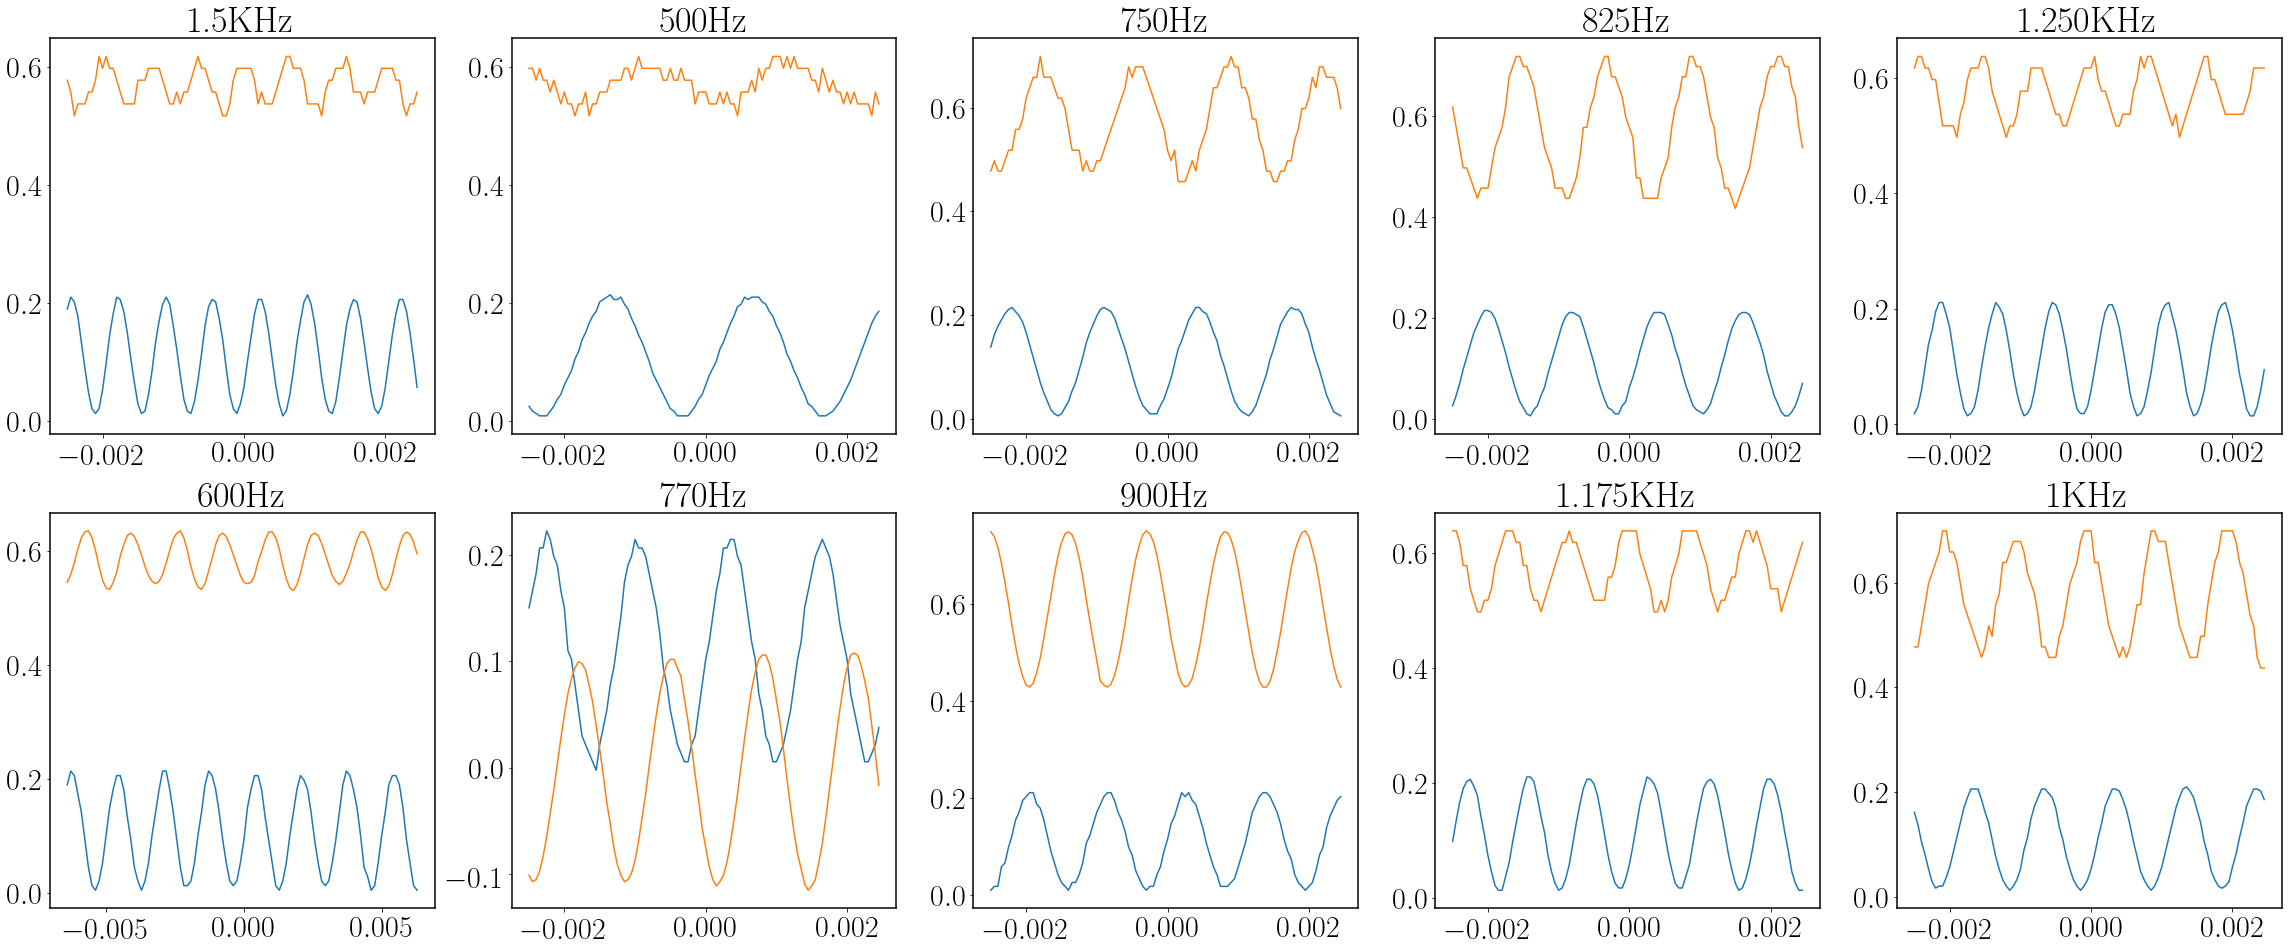

In [53]:
keys = list(sheets.keys())

fig = plt.figure()
fig.set_size_inches(40, 16)

for i in range(len(keys)):
    ax = fig.add_subplot(2, 5, i+1)
    test = sheets[keys[i]]

    ax.plot(test['Time (Secs)'], test['CHAN1'])
    ax.plot(test['Time (Secs)'], 0.1*test['CHAN2'])
    
    ax.set_title(keys[i])

## FIT

In [169]:
def fit_func(x, p0, p1, p2, p3):
    return p0*np.sin(p1*x + p2) + p3

In [212]:
db     = pd.ExcelFile(path)
sheets = dict() #DICIONÁRIO COM AS FOLHAS

for freq in db.sheet_names:
    data = db.parse(freq)[['Time (Secs)', 'CHAN1', 'CHAN2']]
    sheets[freq] = data
    
sheet_names = [freq[:-2] for freq in db.sheet_names]

freqs = list() #LISTA COM OS VALORES DE FREQUÊNCIA
for freq in sheet_names:
    if freq[-1] == 'K':
        freqs.append(float(freq[:-1])*1e3)
    else:
        freqs.append(float(freq))

5.704323183527832
5.728411182151704
5.738697351443675
5.734271563330894
5.727109496423268
5.852157746466823
-0.02526002877824686
5.87932043577035
5.754067345399998
5.758306610623648


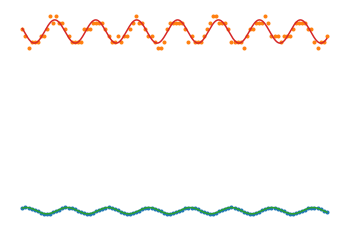

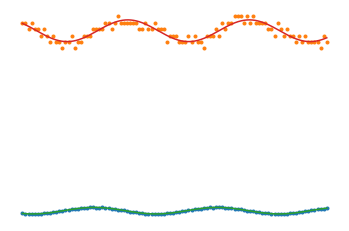

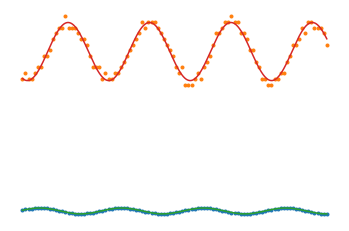

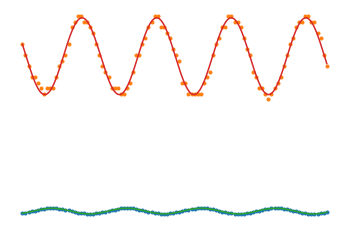

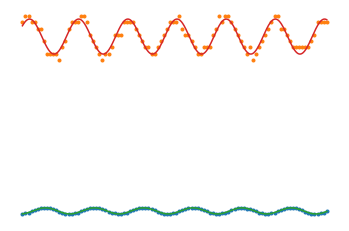

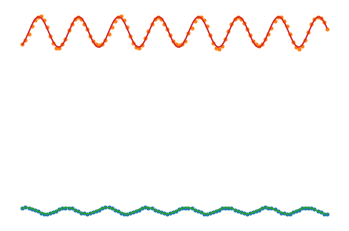

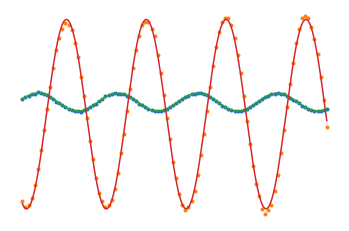

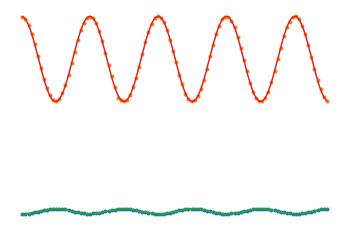

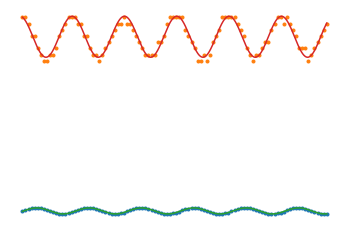

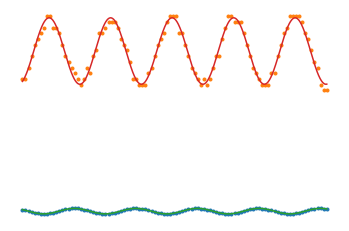

In [213]:
ch_in  = 'CHAN1'
ch_out = 'CHAN2'

AMPS   = list()
PHSS   = list()
Vi     = list()
Vo     = list()

i=0
for freq in db.sheet_names:
    fig = plt.figure()
    plt.axis(False)
    
    data = sheets[freq] 
    
    
    param_bounds=([-np.inf,-np.inf, 0, -np.inf],[np.inf, np.inf, 2*np.pi, np.inf])
    param_bounds=([-np.inf,-np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf])
    
    popti, pcov = curve_fit(fit_func, data['Time (Secs)'], data[ch_in] , p0=[0.5, 6*freqs[i], 0.2, 0], bounds=param_bounds)
    popto, pcov = curve_fit(fit_func, data['Time (Secs)'], data[ch_out], p0=[0.5, 6*freqs[i], 0.2, 0], bounds=param_bounds)

    plt.plot(data['Time (Secs)'], data[ch_in] , '.', label=ch_in )
    plt.plot(data['Time (Secs)'], data[ch_out], '.', label=ch_out)
    
    db_time = list(data['Time (Secs)'])
    time = np.linspace(db_time[0], db_time[-1], 1000)

    plt.plot(time, fit_func(time, popti[0], popti[1], popti[2], popti[3]))
    plt.plot(time, fit_func(time, popto[0], popto[1], popto[2], popto[3]))
    
    print(popto[-1])
    
    AMPS.append(abs(popti[0])/abs(popto[0]))
    PHSS.append(popto[2] - popti[2])
    Vi.append(popti[0])
    Vo.append(popto[0])
    #PHSS.append([popti[1], popto[1]])
    
    i += 1

In [305]:
AMPS = [y for x,y in sorted(zip(freqs, AMPS))]
PHSS = [y for x,y in sorted(zip(freqs, PHSS))]
Vi   = [y for x,y in sorted(zip(freqs, Vi))]
Vo   = [y for x,y in sorted(zip(freqs, Vo))]

freqs.sort()

In [275]:
Q = 4
wp = 2000*np.pi
K = 24000

exp_values = [wp, K, Q]

def T1_IM(s, wp=wp, K=K, Q=Q):
    return 20*np.log10(np.abs((K*(s*1j)**2)/((s*1j)**2 + s*1j * wp/Q + wp**2)))

def T2_IM(s, wp=wp, K=K, Q=Q):
    return 20*np.log10(np.abs((K*(s*1j)))/np.abs(((s*1j)**2 + (s*1j) * wp/Q + wp**2)))

def T3_IM(s, wp=wp, K=K, Q=Q):
    return 20*np.log10(np.abs((K*wp**2)/((s*1j)**2 + (s*1j) * wp/Q + wp**2)))

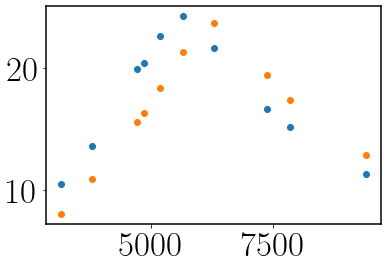

In [276]:
exp_freqs = np.array(freqs)*2*np.pi

plt.plot(exp_freqs, -20*np.log10(AMPS), 'o')
plt.plot(exp_freqs, T2_IM(exp_freqs), 'o')

In [277]:
AMPS_TEST = -20*np.log10(AMPS)

popt, pcov = curve_fit(T2_IM, exp_freqs, AMPS_TEST, p0=exp_values, maxfev=5000)#, bounds=param_bounds)

x = np.linspace(exp_freqs[0], exp_freqs[-1], 1000)

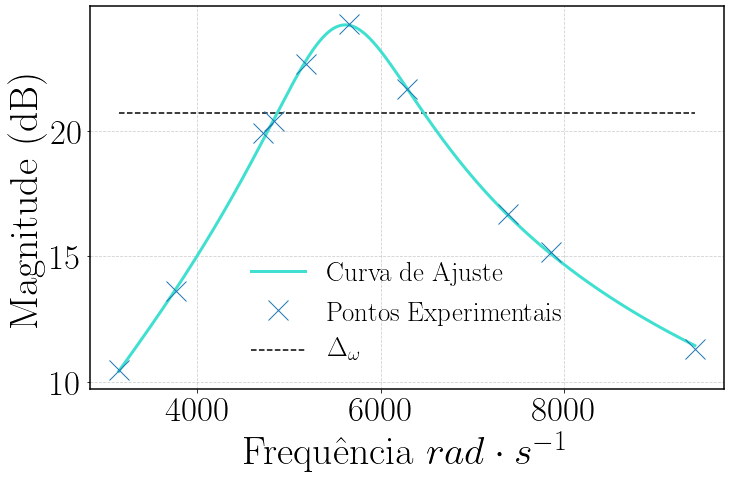

In [293]:
# DESCOMENTAR NO FIM PARA GRAVAR PLOTS EM LATEX. DEMORAM MAIS A GERAR
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 35
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.linewidth'] = 1.5


fig = plt.figure()
fig.set_size_inches(11, 7.5)
ax  = fig.add_subplot(1, 1, 1)

ax.grid(True, which="both", linestyle='--', alpha=0.6)

ax.hlines(20.73, exp_freqs[0], exp_freqs[-1], linestyles='--', label=r'$\Delta_\omega$')

ax.plot(x, T2_IM(x, popt[0], popt[1], popt[2]), lw=3, color='turquoise', label='Curva de Ajuste')
ax.plot(exp_freqs, -20*np.log10(AMPS), 'x', markersize=20, label='Pontos Experimentais')

ax.set_xlabel(r'Frequência $rad \cdot s^{-1}$')
ax.set_ylabel(r'Magnitude (dB)')

ax.legend(frameon=False, fontsize=27)

fig.tight_layout()
fig.savefig('2.6.3.pdf')

In [312]:
for i in Vo:
    print(round(i, 2))

-0.34
-0.48
-1.03
-1.07
-1.39
-1.61
1.17
0.66
0.56
0.36


In [279]:
popt[1]

23336.195605322824

In [282]:
popt[0]/popt[2]

1433.1320020378985

In [221]:
1200*2*np.pi

7539.822368615503

In [283]:
T2_IM(1029*2*np.pi, popt[0], popt[1], popt[2])

20.738486691616806

In [284]:
T2_IM(775*2*np.pi, popt[0], popt[1], popt[2])

20.72388648637659

In [315]:
for i in [popt[0], popt[1], popt[2]]: #[wp, K, Q]
    print(i)

5612.1752406645855
23336.195605322824
3.9160211569374854


# 2.6.5

In [152]:
def get_data(path, columns):
    db     = pd.ExcelFile(path)
    sheets = dict() #DICIONÁRIO COM AS FOLHAS

    for freq in db.sheet_names:
        data = db.parse(freq)[columns]
        sheets[freq] = data
    
    return sheets

In [54]:
path = 'DADOS/2.6.5_3a feira.xlsx'

In [58]:
db = pd.ExcelFile(path)
db.sheet_names

['ScopeData 1', 'Sheet1', 'Sheet2', 'Sheet3']

In [77]:
data = db.parse('ScopeData 1')

In [78]:
time = data['Time (Secs)']
chan1= data['CHAN1']
chan2= data['CHAN2']
chan3= data['CHAN3']

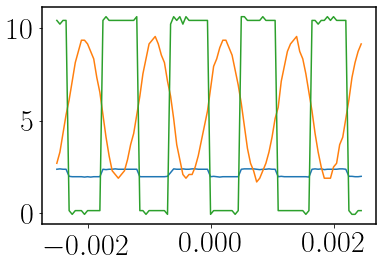

In [80]:
plt.plot(time, chan1)
plt.plot(time, chan2)
plt.plot(time, chan3)